# Mini-Project Part A: Particle Collisions
We have 3 parts to this program corresponding to the different entries in the attack phase.

## Part 1: Simulation

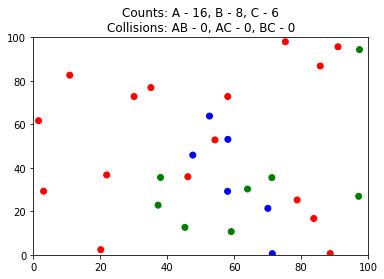

In [5]:
#
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Simulation parameters
box_size = 100
num_particles = 30
species = ['A', 'B', 'C']
collision_count = {'AB': 0, 'AC': 0, 'BC': 0}

# Initialize particles
particles = {
    'x': np.random.rand(num_particles) * box_size,
    'y': np.random.rand(num_particles) * box_size,
    'vx': np.random.randn(num_particles),
    'vy': np.random.randn(num_particles),
    'species': np.random.choice(species, num_particles)
}

def update_particles(frame, particles, scatter, ax):
    # Update positions
    particles['x'] += particles['vx']
    particles['y'] += particles['vy']

    # Check for wall collisions
    particles['vx'] = np.where(np.logical_or(particles['x'] <= 0, particles['x'] >= box_size), -particles['vx'], particles['vx'])
    particles['vy'] = np.where(np.logical_or(particles['y'] <= 0, particles['y'] >= box_size), -particles['vy'], particles['vy'])

    # Check for particle collisions and update species
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            distance = np.sqrt((particles['x'][i] - particles['x'][j])**2 + (particles['y'][i] - particles['y'][j])**2)
            if distance < 2:  # Assume a small radius for collision
                species_pair = ''.join(sorted([particles['species'][i], particles['species'][j]]))
                if species_pair in ['AB', 'AC', 'BC']:
                    # Increment collision counter
                    collision_count[species_pair] += 1

                    # Transform species upon collision
                    all_species = set(species)
                    collided_species = {particles['species'][i], particles['species'][j]}
                    new_species = list(all_species - collided_species)[0]
                    particles['species'][i] = new_species
                    particles['species'][j] = new_species

    # Update colors and text based on species
    colors = np.where(particles['species'] == 'A', 'r', np.where(particles['species'] == 'B', 'g', 'b'))
    
    scatter.set_offsets(np.c_[particles['x'], particles['y']])
    scatter.set_color(colors)

    # Update counter display
    ax.set_title(f'Counts: A - {np.sum(particles["species"] == "A")}, B - {np.sum(particles["species"] == "B")}, C - {np.sum(particles["species"] == "C")}\n'
                 f'Collisions: AB - {collision_count["AB"]}, AC - {collision_count["AC"]}, BC - {collision_count["BC"]}')
    
    return scatter,

# Setup the plot
fig, ax = plt.subplots()
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
scatter = ax.scatter(particles['x'], particles['y'], c='r')

# Animation
ani = animation.FuncAnimation(fig, update_particles, fargs=(particles, scatter, ax), frames=200, interval=50, blit=True)

plt.show()


## Part 2: Population Dynamics Mode (Continuous & Discrete)

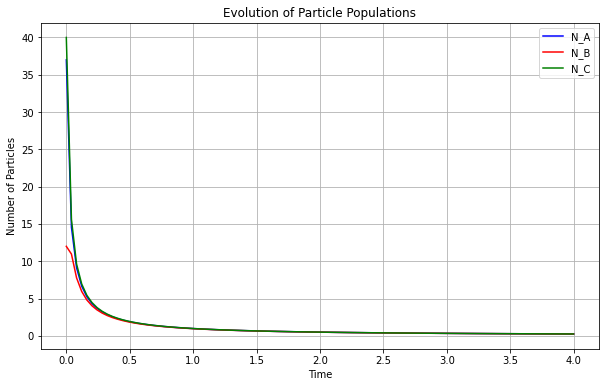

In [34]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
k = 1  # Rate constant
N_A0 = 37  # Initial number of A particles
N_B0 = 12  # Initial number of B particles
N_C0 = 40  # Initial number of C particles

# System of differential equations
def dN_dt(t, N):
    N_A, N_B, N_C = N
    dN_C_dt = -k*N_B*N_C - k*N_A*N_C + k*N_A*N_B
    dN_A_dt = -k*N_A*N_B - k*N_A*N_C + k*N_B*N_C
    dN_B_dt = -k*N_B*N_C - k*N_A*N_B + k*N_A*N_C
    
    return [dN_A_dt, dN_B_dt, dN_C_dt]

# Time span
t_span = (0, 4)
t_eval = np.linspace(*t_span, 100)

# Initial conditions
N0 = [N_A0, N_B0, N_C0]

# Solve the system of differential equations
sol = solve_ivp(dN_dt, t_span, N0, t_eval=t_eval, method='RK45')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='N_A', color='blue')
plt.plot(sol.t, sol.y[1], label='N_B', color='red')
plt.plot(sol.t, sol.y[2], label='N_C', color='green')
plt.xlabel('Time')
plt.ylabel('Number of Particles')
plt.title('Evolution of Particle Populations')
plt.legend()
plt.grid(True)
plt.show()


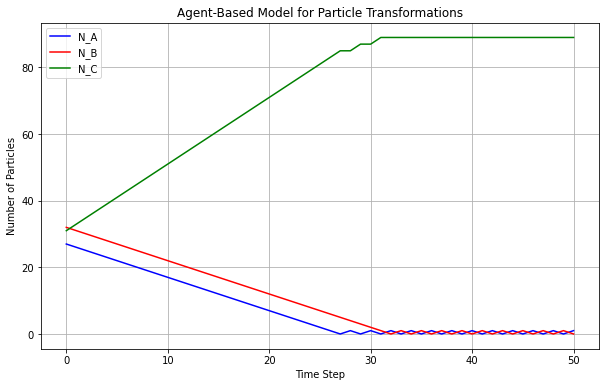

In [42]:
# Re-import necessary libraries and re-run the simulation code after reset
import matplotlib.pyplot as plt

# Define the initial populations
N_A = 27
N_B = 32
N_C = 31
total_particles = N_A + N_B + N_C

# Define the number of iterations (time steps)
iterations = 50

# Record populations over time
history_A = [N_A]
history_B = [N_B]
history_C = [N_C]

# Main simulation loop
for _ in range(iterations):
    if N_A > 0 and N_B > 0:
        # A + B -> C
        N_A -= 1
        N_B -= 1
        N_C += 1
    elif N_A > 0 and N_C > 1:
        # A + C -> B (assumption for demonstration)
        N_A -= 1
        N_C -= 1
        N_B += 1
    elif N_B > 0 and N_C > 1:
        # B + C -> A (assumption for demonstration)
        N_B -= 1
        N_C -= 1
        N_A += 1
    
    # Ensure total_particles is constant; adjust for simplification
    N_C = total_particles - N_A - N_B
    
    # Record the populations
    history_A.append(N_A)
    history_B.append(N_B)
    history_C.append(N_C)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(history_A, label='N_A', color='blue')
plt.plot(history_B, label='N_B', color='red')
plt.plot(history_C, label='N_C', color='green')
plt.xlabel('Time Step')
plt.ylabel('Number of Particles')
plt.title('Agent-Based Model for Particle Transformations')
plt.legend()
plt.grid(True)
plt.show()


## Part 3: Random Collision Model

In [44]:
import random

def simulate_particle_collisions(n_a, n_b, n_c, steps=10000):
    """
    Simulate the particle collisions based on the given rules and initial counts of particles A, B, and C.

    Returns:
    - A tuple with the final counts of particles A, B, and C, and the number of steps actually simulated.
    """
    particles = ['A'] * n_a + ['B'] * n_b + ['C'] * n_c
    for _ in range(steps):
        if len(particles) < 2:
            break  # Stop if there are not enough particles to collide
        
        # Randomly select two particles to collide
        p1, p2 = random.sample(particles, 2)
        
        # Determine the outcome of the collision
        if {'A', 'B'} == {p1, p2}:
            new_particle = 'C'
        elif {'A', 'C'} == {p1, p2}:
            new_particle = 'B'
        elif {'B', 'C'} == {p1, p2}:
            new_particle = 'A'
        else:
            continue  # No reaction occurs if particles are of the same type
        
        # Update the particle list
        particles.remove(p1)
        particles.remove(p2)
        particles.append(new_particle)
    
    # Count the final number of each type of particle
    final_n_a = particles.count('A')
    final_n_b = particles.count('B')
    final_n_c = particles.count('C')
    
    return final_n_a, final_n_b, final_n_c, len(particles)

# Example initial conditions
n_a, n_b, n_c = 20, 20, 20  # Starting with an equal number of each particle type
final_n_a, final_n_b, final_n_c, remaining_particles = simulate_particle_collisions(n_a, n_b, n_c)

final_n_a, final_n_b, final_n_c, remaining_particles


(0, 0, 2, 2)